### Loading the csv file and making some changes and verifications

In [1]:
import pandas as pd

In [2]:
# load the dataset mushroom, where the objective is predict whether a mushroom is poisonous or not ("class" column)
dataset = pd.read_csv('./dataset/mushroom_cleaned.csv')
dataset

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [3]:
# change the name "class" to "poisonous"
dataset.rename(columns={'class':'poisonous'}, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   poisonous        54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [4]:
### TO - DO
# Fazer uns gráficos mostrando como os valores de cada parâmetro se distribui
# Se for possível fazer esses valores em relação a ser ou não venenoso

In [5]:
# see if there are any null values
dataset.isnull().sum(axis=0)

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
poisonous          0
dtype: int64

In [6]:
labels = dataset.poisonous

dataframe = dataset.drop('poisonous',inplace=False, axis=1)
dataframe

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


### Making a full decision tree and rendering in a pdf (just for curiosity)

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [8]:
tree = DecisionTreeClassifier()

# training the tree with all data
tree.fit(dataframe, labels) 

DecisionTreeClassifier()

In [9]:
tree.get_params()
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [10]:
# ploting the tree in a pdf 'out.pdf'
labels_name = ['0', '1']
graph_date = export_graphviz(tree, feature_names=dataframe.columns, class_names=labels_name, filled=True)
graph = graphviz.Source(graph_date.replace(' fillcolor="#399de5"', ' fillcolor="#399de5", shape="diamond"'))
# graph.render('out')

# interpretação dos nós da arvore
# +-----------------+
# |  atributo <= ?  | # indica qual atribulo foi selecionado por ter maior ganho de informação e a valor que melhor divide o dataset com base nesse atributo (se verdadeiro vai pra esquerda se falso direita)
# |    gini = ?     | # nivel de impureza do atributo com base na classe
# |   samples = ?   | # quantidade de exemplos dos dados de treino utilizado na analise desse nó
# | values = [?, ?] | # quantidade de exemplos por classe
# |    class = ?    | # qual a classe se a analise parar nesse nó (selecionado com base na classe com maior número de exemplo (classe majoritária))
# +-----------------+

### Making the tests and predictions

In [11]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [12]:
# separating the data in 2 groups (training and testing), the test group will have 10% of the data
train, test, res_train, res_test = train_test_split(dataframe, labels, test_size=0.1)

In [13]:
# Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. 
# In short, this value will reduce the tree, but the probabilities will change
tree = DecisionTreeClassifier(ccp_alpha=0.001)
tree.fit(train, res_train)

DecisionTreeClassifier(ccp_alpha=0.001)

In [14]:
# plotar a arvore de decisão em pdf para melhor visualização
labels_name = ['0', '1']
graph_date = export_graphviz(tree, feature_names=dataframe.columns, class_names=labels_name, filled=True)
graph = graphviz.Source(graph_date.replace(' fillcolor="#399de5"', ' fillcolor="#399de5", shape="diamond"'))
# graph = graphviz.Source(graph_date)
graph.render('out_teste')

'out_teste.pdf'

In [15]:
# predicting using the test group (0 or 1)
predict_values = tree.predict(test)
predict_values

array([0, 0, 1, ..., 0, 1, 1])

In [16]:
# predicting using the test group (probability of 0 or 1)
predict_probabilities = tree.predict_proba(test)
predict_probabilities

array([[0.89609181, 0.10390819],
       [0.91317829, 0.08682171],
       [0.11069718, 0.88930282],
       ...,
       [0.89609181, 0.10390819],
       [0.09450549, 0.90549451],
       [0.06229508, 0.93770492]])

### Make some differents evalutions

In [17]:
from sklearn.metrics import f1_score

macro = f1_score(res_test, predict_values, average='macro')
micro = f1_score(res_test, predict_values, average='micro')

print("F1-Macro: {:.4f}\nF1-Micro: {:.4f}".format(macro, micro))

F1-Macro: 0.9211
F1-Micro: 0.9219


In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(res_test, predict_values)

0.9219096965210954

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(res_test, predict_values)

# mostra em forma de matriz, quantos deram (1,1), (1,0) (0,1), (0,0)
# como a precisão é alta, os valores da diagonal principal sao maiores
# (0,0)   (0,1)
# (1,0)   (1,1)
# PODE OLHAR SE TA TENDO MAIS FALSO POSITIVO OU FALSO NEGATIVO

array([[2216,  227],
       [ 195, 2766]])

In [20]:
from sklearn.metrics import classification_report

print(classification_report(res_test, predict_values, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2443
           1       0.92      0.93      0.93      2961

    accuracy                           0.92      5404
   macro avg       0.92      0.92      0.92      5404
weighted avg       0.92      0.92      0.92      5404



### Making some insights

In [21]:
features_names = dataframe.columns
features_names

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season'],
      dtype='object')

In [22]:
feature_importance = pd.DataFrame(tree.feature_importances_, index=features_names).sort_values(0, ascending=False)
feature_importance

,0
stem-width,0.233390
gill-attachment,0.180234
stem-color,0.157905
stem-height,0.139599
gill-color,0.135883
cap-diameter,0.065727
cap-shape,0.054890
season,0.032371


<Axes: >

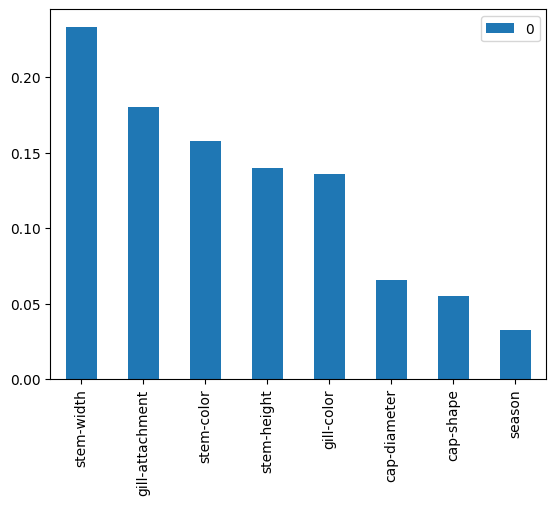

In [23]:
feature_importance.plot(kind='bar')